In [128]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [129]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
Iris = pd.read_csv('iris.csv')
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [130]:
Iris.shape

(150, 5)

In [131]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris = Iris[0:100]
Iris.shape

(100, 5)

In [132]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
# line3-------------------------
Iris.loc[Iris['species']=="setosa",'species']=0
Iris.loc[Iris['species']=="versicolor",'species']=1
# Iris[Iris["species"]=="setosa"]["species"]=0
# Iris[Iris["species"]=="versicolor"]["species"]=1


In [133]:
setosa = Iris[Iris["species"]==0]
versicolor = Iris[Iris["species"]==1]

In [134]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


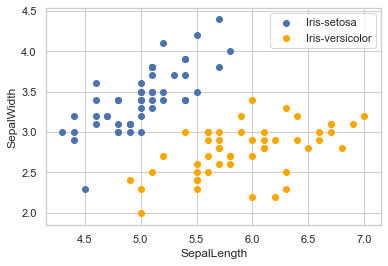

In [135]:
#visualization of given dataset
#codesegment4------------------

plt.scatter(setosa["sepal_length"],setosa["sepal_width"],color = 'b')
plt.scatter(versicolor["sepal_length"],versicolor["sepal_width"],color = 'orange')
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.legend(labels=['Iris-setosa','Iris-versicolor'])
plt.show()
# plt.legend(loc='best')

In [136]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output


In [137]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
#line5-------------
np.random.seed(seed)
#line6-------------
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
#line7-----------------------------------------------
train_index = np.random.choice(len(X),round(len(X)*0.8))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [138]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]


In [139]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    return (data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))
train_X = min_max_normalized(train_X)
test_X = min_max_normalized(test_X)


In [140]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W = tf.Variable(tf.random_normal(shape=[4, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [141]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])
# Variable defines its shape as well as its values and data type, while Placeholder just defines its shape and data type.

In [142]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod = tf.matmul(data,W)+b

In [143]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [202]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
#line12--------------------------------
learning_rate=0.01
#batch_size---- #using batch makes the training ------?
#line13--------------------------------
batch_size = 30
#iter_num
iter_num=1500

In [203]:
# Define the optimizer with name opt
#line14-----------------------------
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [204]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [205]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
itera=[]

In [208]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #line15------------------------------ #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.choice(len(train_X),batch_size)
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    #line16---------------------------
    temp_train_acc = sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y})

    # recode the results of loss and train accuracy
    #codesegment17---------------------
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    itera.append(epoch)
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} '.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
#Write the command to calculate test accuracy:
#line18-------------------------------
temp_test_acc = sess.run(accuracy, feed_dict = {data: test_X, target: np.matrix(test_y).T})

print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.002693 train_acc: 1.000000 
epoch:  200 loss: 0.003143 train_acc: 1.000000 
epoch:  300 loss: 0.002990 train_acc: 1.000000 
epoch:  400 loss: 0.003830 train_acc: 1.000000 
epoch:  500 loss: 0.002458 train_acc: 1.000000 
epoch:  600 loss: 0.003758 train_acc: 1.000000 
epoch:  700 loss: 0.003275 train_acc: 1.000000 
epoch:  800 loss: 0.002526 train_acc: 1.000000 
epoch:  900 loss: 0.003763 train_acc: 1.000000 
epoch: 1000 loss: 0.003504 train_acc: 1.000000 
epoch: 1100 loss: 0.004104 train_acc: 1.000000 
epoch: 1200 loss: 0.002415 train_acc: 1.000000 
epoch: 1300 loss: 0.002817 train_acc: 1.000000 
epoch: 1400 loss: 0.004982 train_acc: 1.000000 
epoch: 1500 loss: 0.005119 train_acc: 1.000000 
The test accuracy is: 1.000000


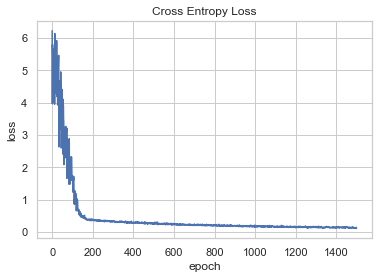

In [0]:
# Visualization of the results
# loss function
#codesegment19------------------------
plt.plot(itera,loss_trace)
plt.show()

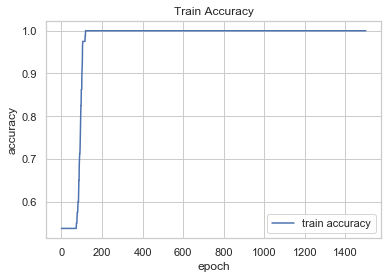

In [0]:
# plot for training accuracy
#codesegment20---------------------------
plt.plot(itera,train_acc)
plt.show()